In [3]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas_datareader]pandas_datareader]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
# Import thư viện
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [7]:
!pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 31.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=5c9cc782ed85a8a1f0469a693f4476c1d5ac4be5542e004f5aac20a9189904f8
  Stored in directory: /home/codespace/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=1049310 sha256=5306861fe1ad5b80b7b93e6b0096f2aea137be4cf7ad2c3e90166718188a6a86
  Stored in directory: /home/codespace/.cache/pip/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successful

In [9]:
# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override()

In [12]:
import warnings
warnings.filterwarnings("ignore")
# Thiết lập khoảng thời gian và phong cách biểu đồ
sns.set_style('whitegrid')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 1, 1)

# Tải dữ liệu từ Yahoo Finance
# df = web.DataReader('AAPL', start, end)
df = yf.download('AAPL', start=start, end=end)
df = df.xs('AAPL', axis=1, level='Ticker')

[*********************100%***********************]  1 of 1 completed


In [13]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv', parse_dates=True, index_col='Date')

In [14]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.796833,26.838361,26.476148,26.716085,115127600
2017-01-04,26.766840,26.879889,26.704549,26.727620,84472400
2017-01-05,26.902962,26.960639,26.718394,26.743772,88774400
2017-01-06,27.202883,27.260560,26.870661,26.942181,127007600
2017-01-09,27.452049,27.553562,27.209806,27.212112,134247600
...,...,...,...,...,...
2020-12-24,128.591034,130.042889,127.743314,127.957683,54930100
2020-12-28,133.190216,133.823568,130.091628,130.559349,124486200
2020-12-29,131.416824,135.236456,130.900395,134.515412,121047300


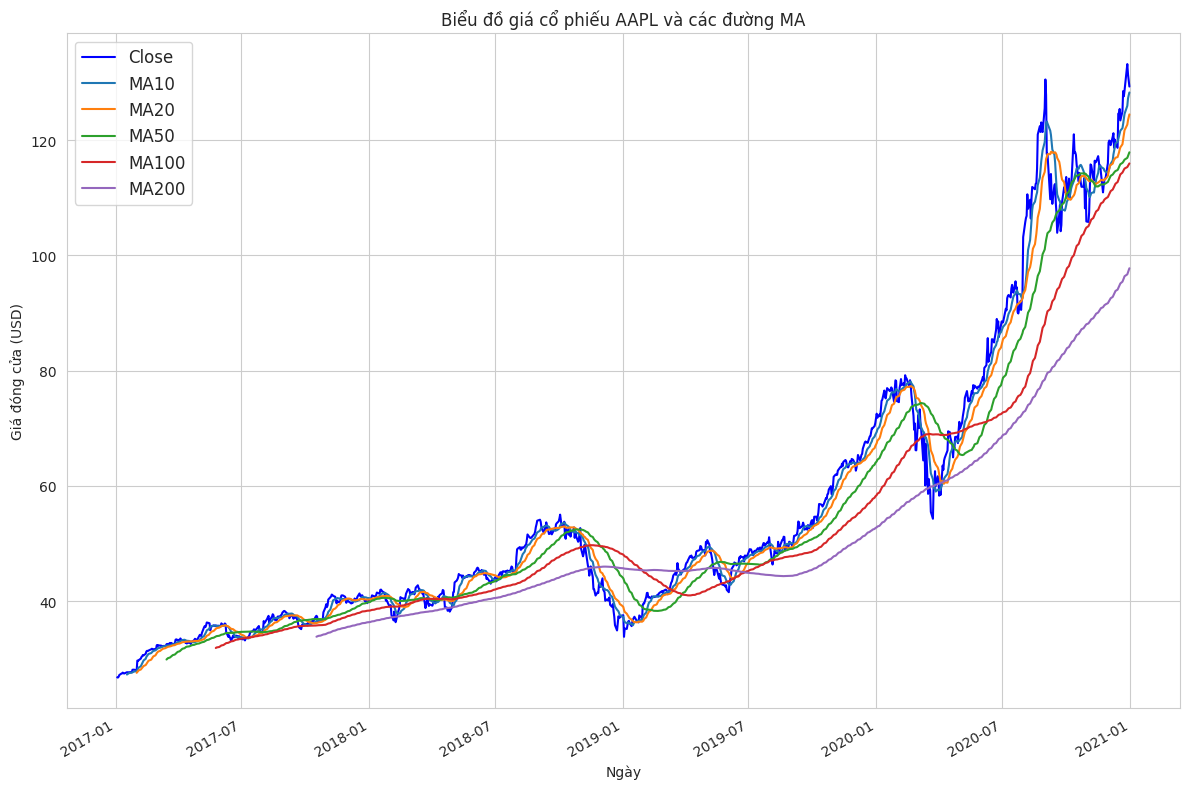

In [15]:
# Làm sạch dữ liệu
df = df.dropna()
df = df[df['Close'] != 0]

# Tính các đường trung bình động
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Vẽ biểu đồ giá đóng cửa và các đường MA
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')

# Thiết lập nhãn và tiêu đề
plt.title('Biểu đồ giá cổ phiếu AAPL và các đường MA')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (USD)')
plt.legend(loc='upper left', fontsize=12)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('AAPL_plot.png', dpi=300)
plt.show()